In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# paths to best models:
UNET_PATH = '../u_net/v07'
CONVLSTM_PATH = '../conv_lstm/v05'
FLOWTRANS_PATH = '../flowtransformer/v07'

In [3]:
unet_test_data = pd.read_csv(f'{UNET_PATH}/test_losses.csv')
convlstm_test_data = pd.read_csv(f'{CONVLSTM_PATH}/test_losses.csv')
flowtrans_test_data = pd.read_csv(f'{FLOWTRANS_PATH}/test_losses.csv')

unet_test_data.head(5)

,Re,ts,L1 Loss,MSE Loss
0,150.0,0.50,0.103356,0.017651
1,150.0,0.55,0.104069,0.017705
2,150.0,0.60,0.104726,0.017837
3,150.0,0.65,0.105635,0.018006
4,150.0,0.70,0.105964,0.018053


In [4]:
# average l1 loss over all timesteps for every Re
unet_l1_loss_re = unet_test_data.groupby('Re').mean()['L1 Loss']
convlstm_l1_loss_re = convlstm_test_data.groupby('Re').mean()['L1 Loss']
flowtrans_l1_loss_re = flowtrans_test_data.groupby('Re').mean()['L1 Loss']

unet_l1_loss_ts = unet_test_data.groupby('ts').mean()['L1 Loss']
convlstm_l1_loss_ts = convlstm_test_data.groupby('ts').mean()['L1 Loss']
flowtrans_l1_loss_ts = flowtrans_test_data.groupby('ts').mean()['L1 Loss']

unet_l1_loss_ts

ts
0.50    0.029335
0.55    0.029036
0.60    0.028793
0.65    0.028712
0.70    0.028489
          ...   
9.70    0.031628
9.75    0.031640
9.80    0.031646
9.85    0.031672
9.90    0.031683
Name: L1 Loss, Length: 189, dtype: float64

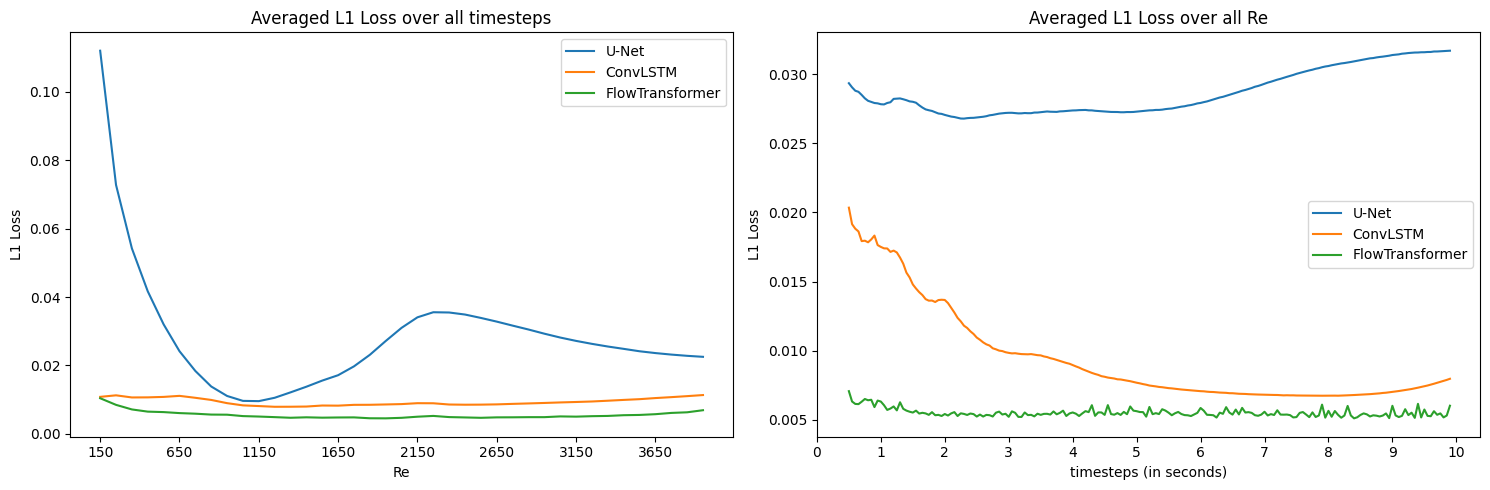

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(unet_l1_loss_re, label='U-Net')
ax[0].plot(convlstm_l1_loss_re, label='ConvLSTM')
ax[0].plot(flowtrans_l1_loss_re, label='FlowTransformer')
x_ticks = np.arange(150, 4150, 500)
ax[0].set_xticks(x_ticks)
ax[0].set_xlabel('Re')
ax[0].set_ylabel('L1 Loss')
ax[0].set_title('Averaged L1 Loss over all timesteps')
ax[0].legend()

ax[1].plot(unet_l1_loss_ts, label='U-Net')
ax[1].plot(convlstm_l1_loss_ts, label='ConvLSTM')
ax[1].plot(flowtrans_l1_loss_ts, label='FlowTransformer')
ax[1].set_xticks(np.arange(0, 11, 1))
ax[1].set_xlabel('timesteps (in seconds)')
ax[1].set_ylabel('L1 Loss')
ax[1].set_title('Averaged L1 Loss over all Re')
ax[1].legend()

plt.tight_layout()
plt.savefig('l1_loss.png')
plt.show()